In [15]:
import pandas as pd
import plotly
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default='notebook'

In [16]:
df = pd.read_table('tpm_new.txt')
df.rename(columns={df.columns[0]:'Transcript/RepeatID'}, inplace=True)
# take only the first gene from annotation colum *) 
df['Annotation'] = df['Annotation/Divergence'].apply(lambda x : x.split('|')[0])
# df.head()

In [17]:
df2 = df.loc[:,['Annotation','Control1_1_combined/ TPM',
       'Control1_2_combined/ TPM', 'Control2_1_combined/ TPM',
       'Control2_2_combined/ TPM', 'Control3_1_combined/ TPM',
       'Control3_2_combined/ TPM', 'MZ_Cotwin1_clone1_combined/ TPM',
       'MZ_Cotwin1_clone2_combined/ TPM', 'MZ_Cotwin2_clone1__combined/ TPM',
       'MZ_Cotwin2_clone2_combined/ TPM', 'MZ_Patient1_clone1_combined/ TPM',
       'MZ_Patient1_clone2_combined/ TPM', 'MZ_Patient2_clone1_combined/ TPM',
       'MZ_Patient2_clone2_combined/ TPM']]
df2.index = df['Annotation']
df2.drop(columns='Annotation', inplace=True)
# df2=df2.T
print(df2.shape)
df2.head()

(27234, 14)


,Control1_1_combined/ TPM,Control1_2_combined/ TPM,Control2_1_combined/ TPM,Control2_2_combined/ TPM,Control3_1_combined/ TPM,Control3_2_combined/ TPM,MZ_Cotwin1_clone1_combined/ TPM,MZ_Cotwin1_clone2_combined/ TPM,MZ_Cotwin2_clone1__combined/ TPM,MZ_Cotwin2_clone2_combined/ TPM,MZ_Patient1_clone1_combined/ TPM,MZ_Patient1_clone2_combined/ TPM,MZ_Patient2_clone1_combined/ TPM,MZ_Patient2_clone2_combined/ TPM
Annotation,,,,,,,,,,,,,,
MPV17L,0.000,0.000,0.000,0.000,0.000,0.010,0.008,0.000,0.000,0.000,0.000,0.000,0.005,0.000
AFF4,17.663,26.385,10.406,20.349,16.219,16.845,22.094,18.512,15.524,22.600,21.762,16.217,16.493,24.713
ZGLP1,3.873,4.080,5.493,4.850,4.719,4.169,3.705,4.053,4.938,6.857,5.948,5.856,5.109,5.052
LOC105373021,0.234,0.298,1.509,1.142,0.592,0.308,1.052,1.182,0.113,0.669,1.007,0.391,1.087,0.044
GABPB1-AS1,7.074,6.941,6.798,6.856,5.325,5.291,6.922,6.638,5.605,7.752,7.294,6.893,5.724,5.869


In [18]:
genes_list =  ['PDE4D','PDE4DIP','PDE4A','PDE4B','PDE4C']
genes_list =  ['PDE4D','PDE4A','PDE4B','PDE4C']

In [19]:
def cor_matrix_plot(df, title): 
    # pairwise correlation
    corr = df.corr(method = 'pearson')
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize=(15,10))
    ax = sns.heatmap(corr, mask=mask , linewidth=0.5,  cmap='gist_rainbow', annot=True,  fmt = '.2f')
    plt.title(title, fontdict={'size': 18})
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14)

    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=20)

    # exportFig2File(plt, 'correlation_matrix')
    plt.show()

In [20]:
reduced_df = df2[df2.sum(axis=1)>1].T
reduced_df.shape

(14, 18611)

In [21]:
corr = reduced_df.corr()
corr.shape

(18611, 18611)

In [22]:
genes_list =  ['PDE4D','PDE4A','PDE4B','PDE4C']
corr_df = corr[genes_list]
corr_df.head()

Annotation,PDE4D,PDE4A,PDE4B,PDE4C
Annotation,,,,
AFF4,0.512000,0.506495,0.375904,0.275204
ZGLP1,0.373529,0.216913,0.465050,-0.305670
LOC105373021,0.224472,0.004973,0.378694,0.330904
GABPB1-AS1,0.549716,0.308803,0.533120,0.262940
CHDH,0.562841,0.442283,0.578725,0.566072


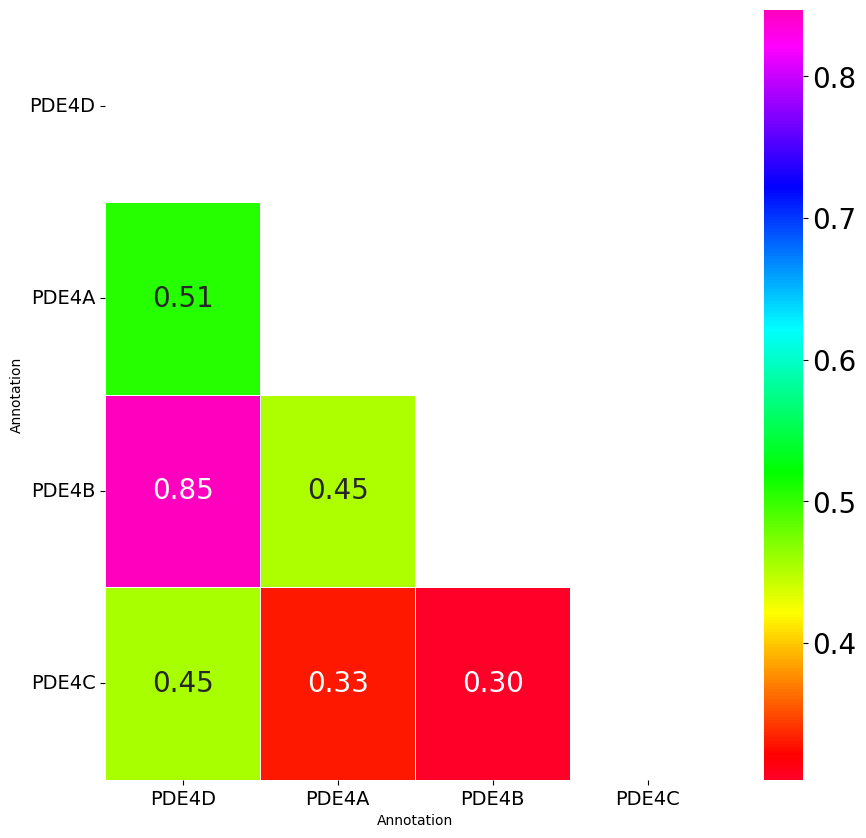

In [23]:

title=''

corr = corr_df.loc[genes_list,genes_list]
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(10,10))
ax = sns.heatmap(corr, mask=mask , linewidth=0.5,  cmap='gist_rainbow', annot=True,  fmt = '.2f', annot_kws={'size':20})
plt.title(title, fontdict={'size': 18})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14, rotation=0)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14, rotation=0,  rotation_mode="anchor")

cbar = ax.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)


plt.savefig('inter-genes-correlation.eps')
plt.show()

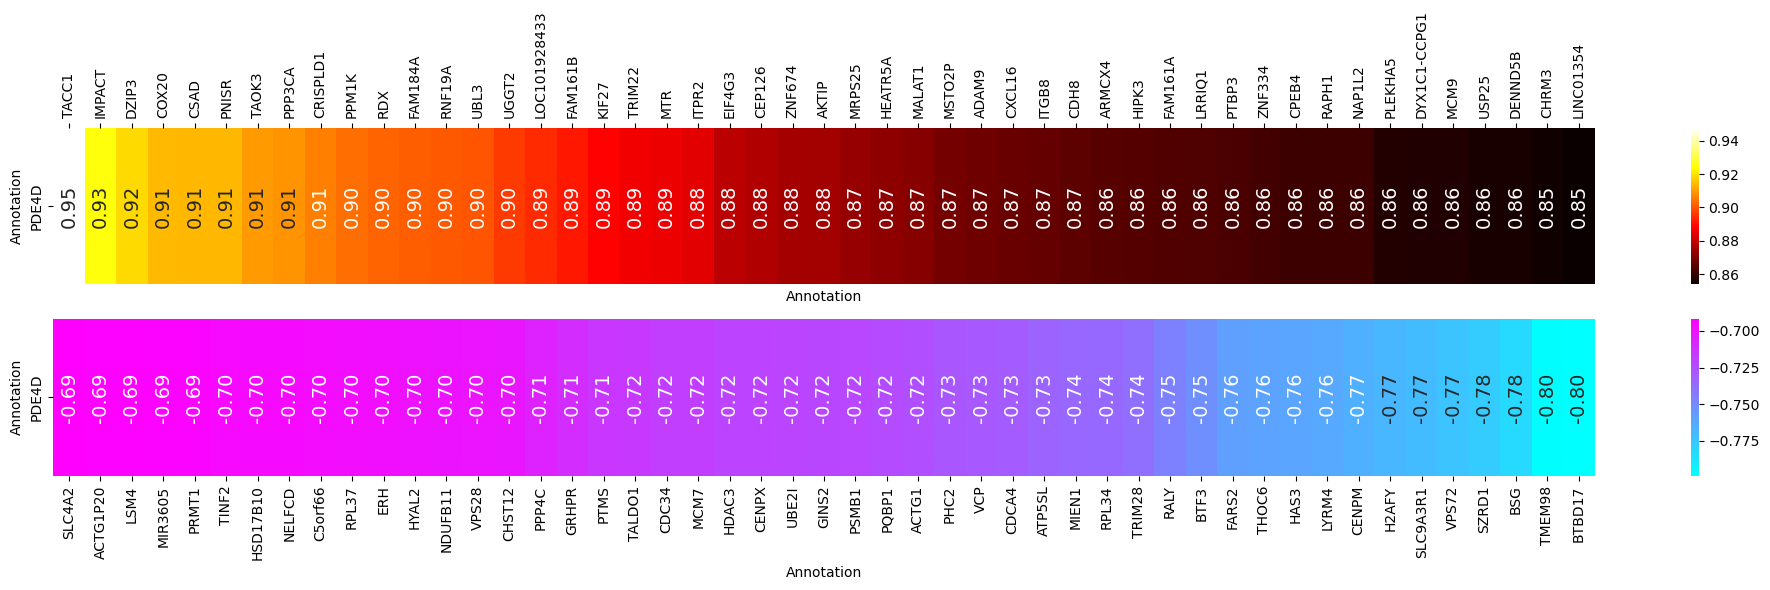

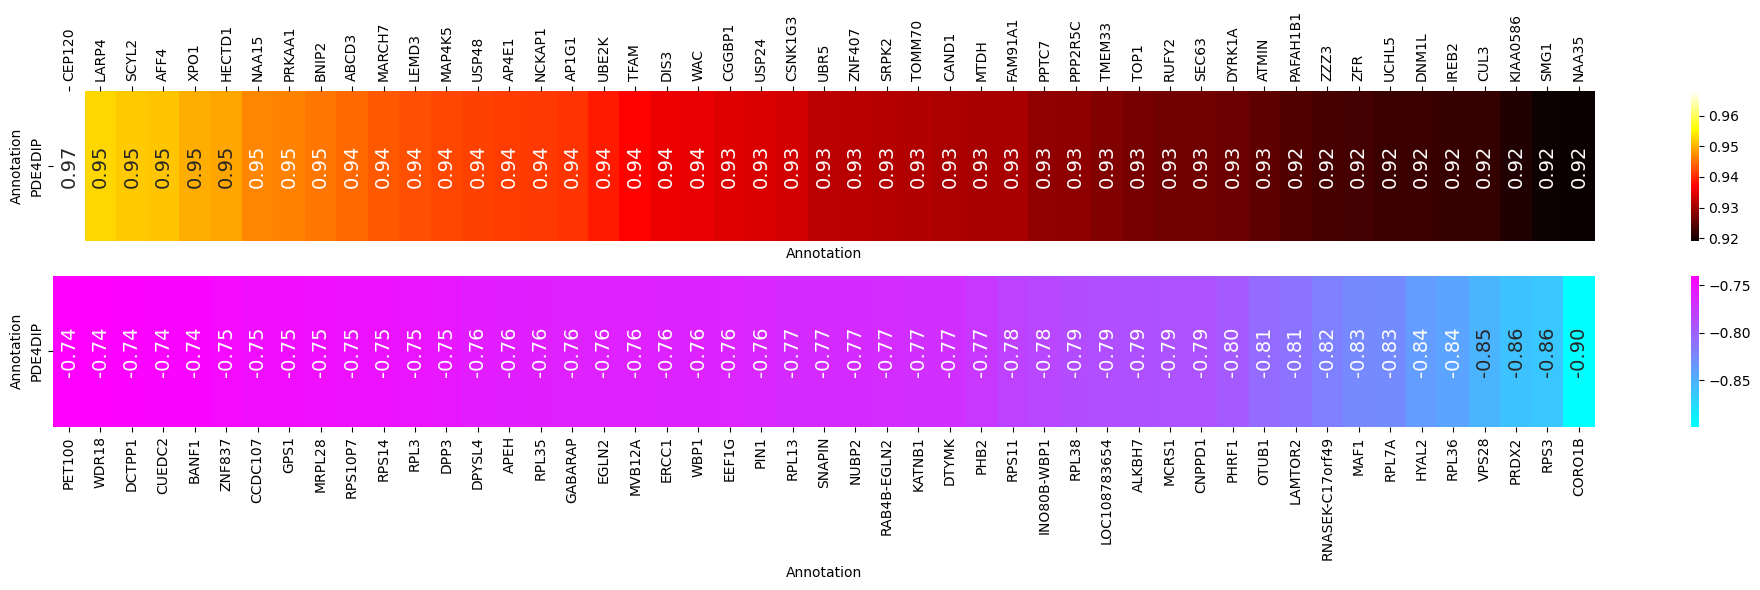

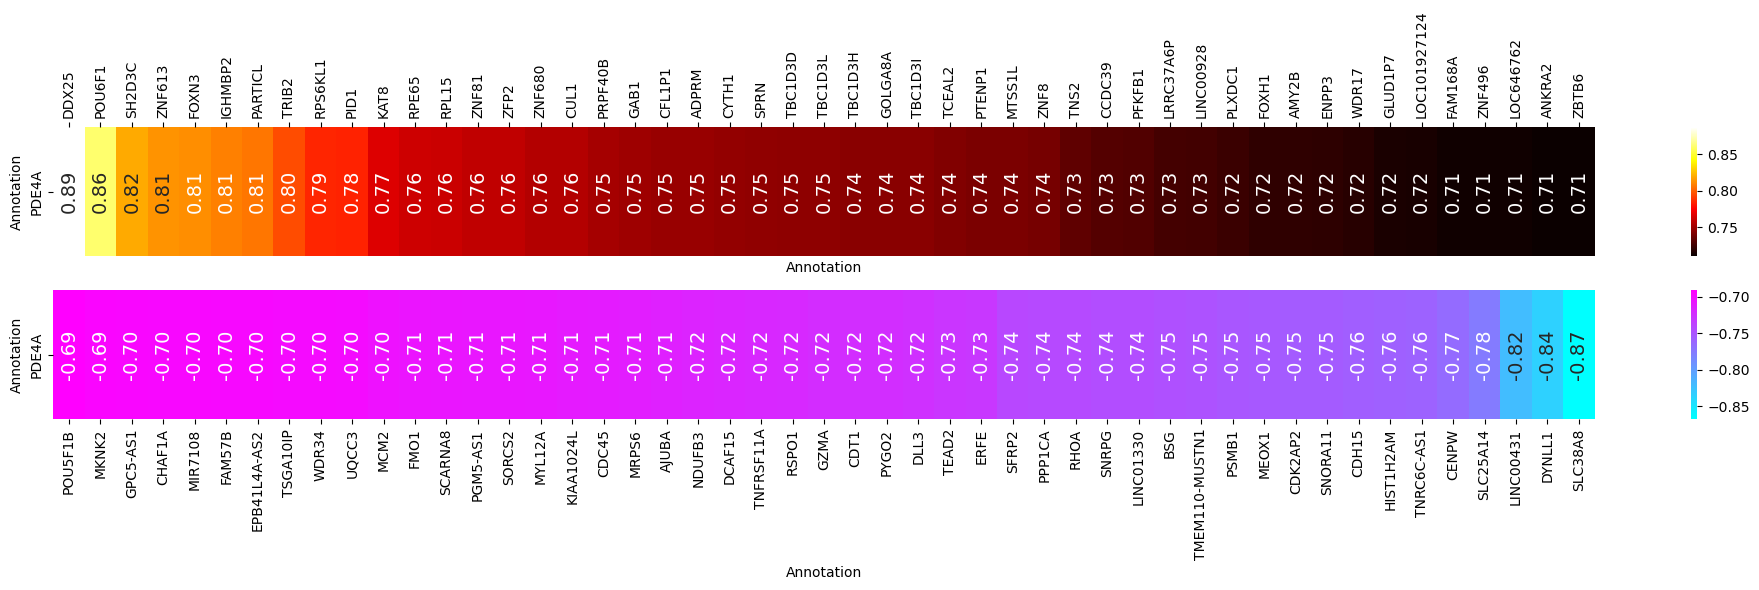

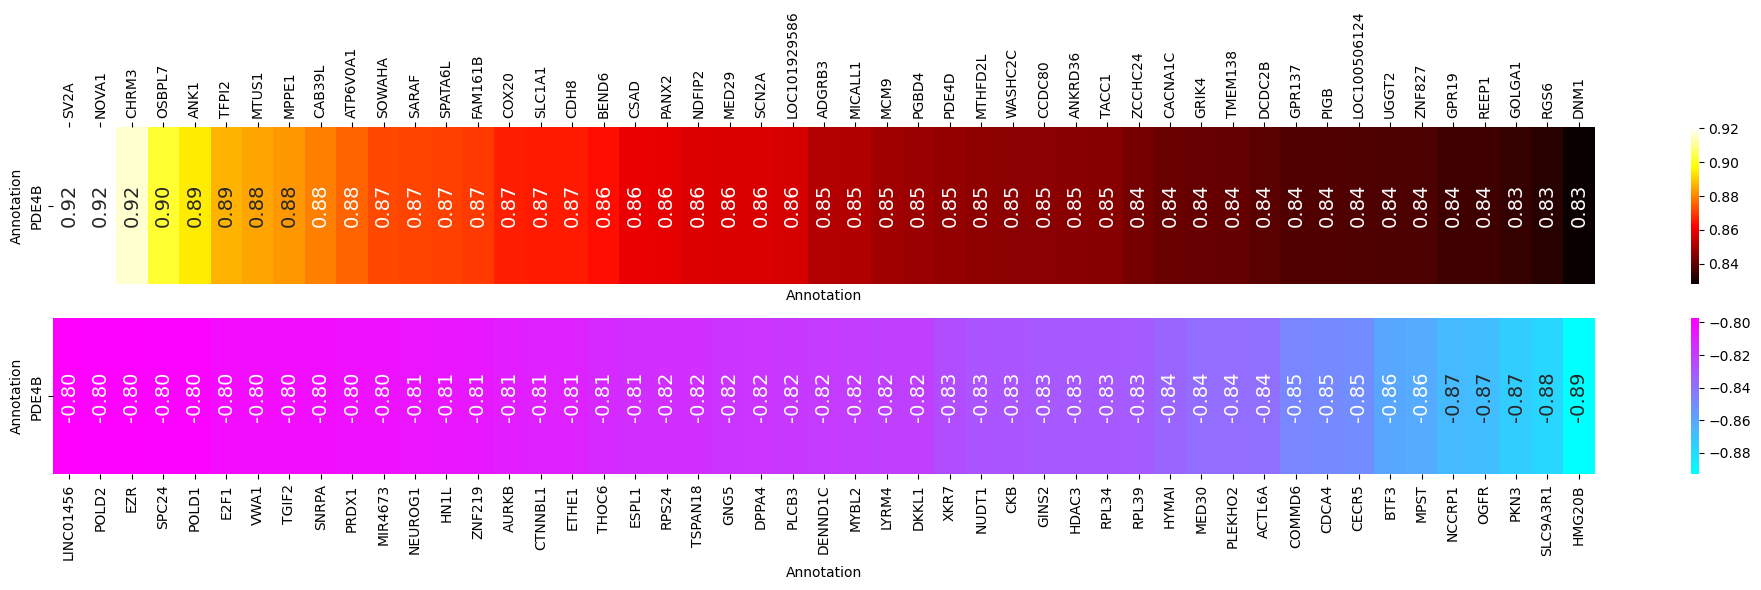

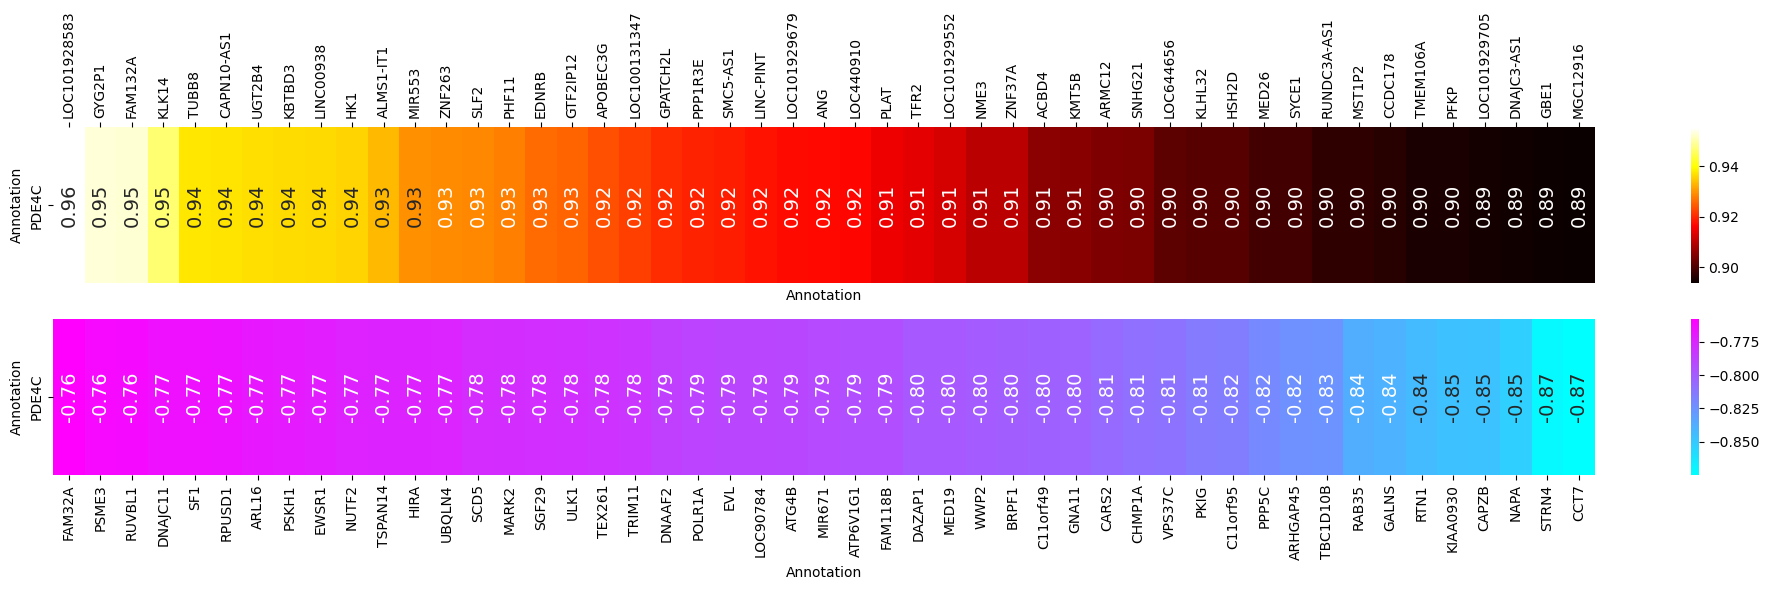

In [49]:
for gene in genes_list:
    singleGene_correlation_pos =  corr_df[[gene]].sort_values(by=gene, ascending=False).iloc[1:50,:]
    singleGene_correlation_neg =  corr_df[[gene]].sort_values(by=gene, ascending=True).iloc[1:50,:]
    singleGene_correlation_neg = singleGene_correlation_neg.iloc[::-1,]

    fig, (ax0,ax1) = plt.subplots(2,1,figsize=(20,6))
    sns.heatmap(singleGene_correlation_pos.T, ax = ax0, cmap='hot', annot=True,  fmt = '.2f', annot_kws={'size':14, 'rotation':90})
    sns.heatmap(singleGene_correlation_neg.T, ax = ax1, cmap='cool', annot=True,  fmt = '.2f', annot_kws={'size':14, 'rotation':90})
    ax0.tick_params(right=False, top=False, labelright=False, labeltop=False, rotation=90)

    ax0.xaxis.tick_top() # x axis on top
    plt.tight_layout()
    plt.savefig(gene + '_correlation_with_others.eps')
    plt.show()



In [ ]:


sns.heatmap(singleGene_correlation.T, cmap='gist_rainbow', annot=True,  fmt = '.2f', annot_kws={'size':14, 'rotation':90})

In [14]:
def disp_corr4singleGene(gene): 
    singleGene_correlation =  corr_df[[gene]].abs().sort_values(by=gene, ascending=False).iloc[1:50,:]
    plt.figure(figsize=(30,2))
    sns.heatmap(singleGene_correlation.T, cmap='gist_rainbow', annot=True,  fmt = '.2f', annot_kws={'size':14, 'rotation':90})

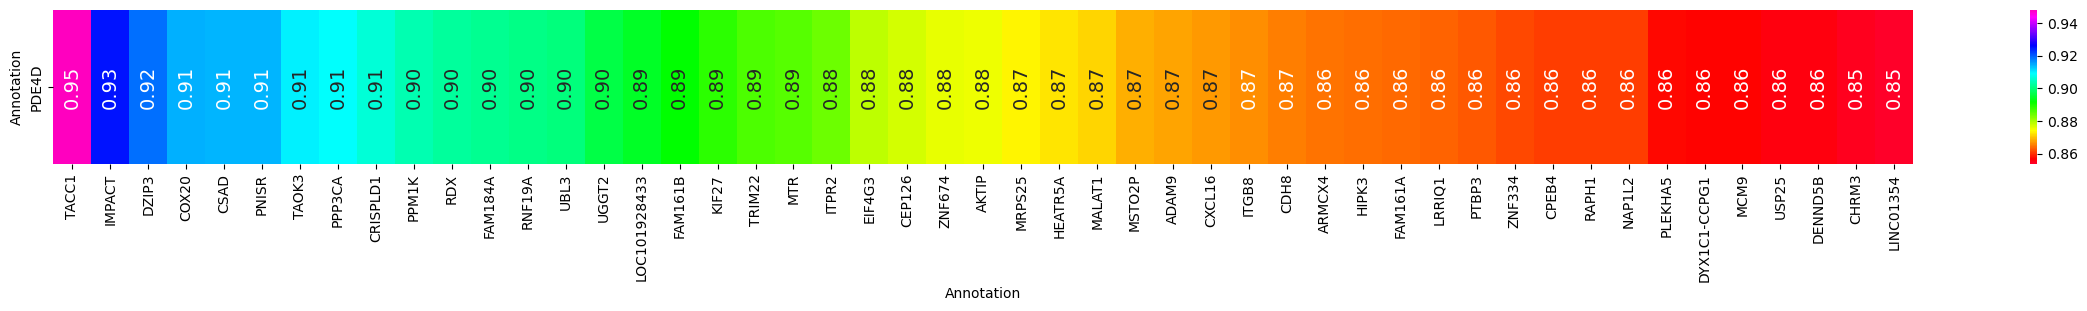

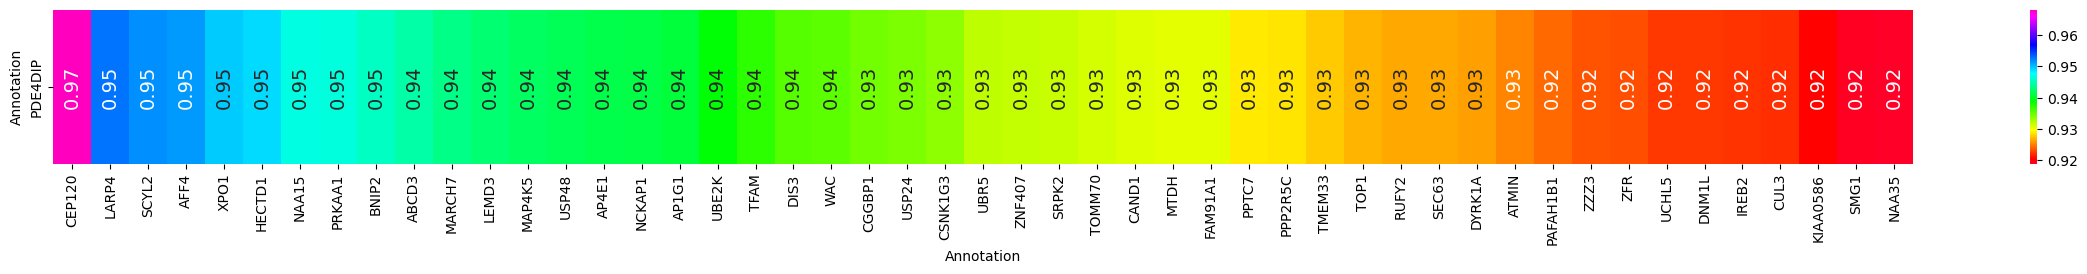

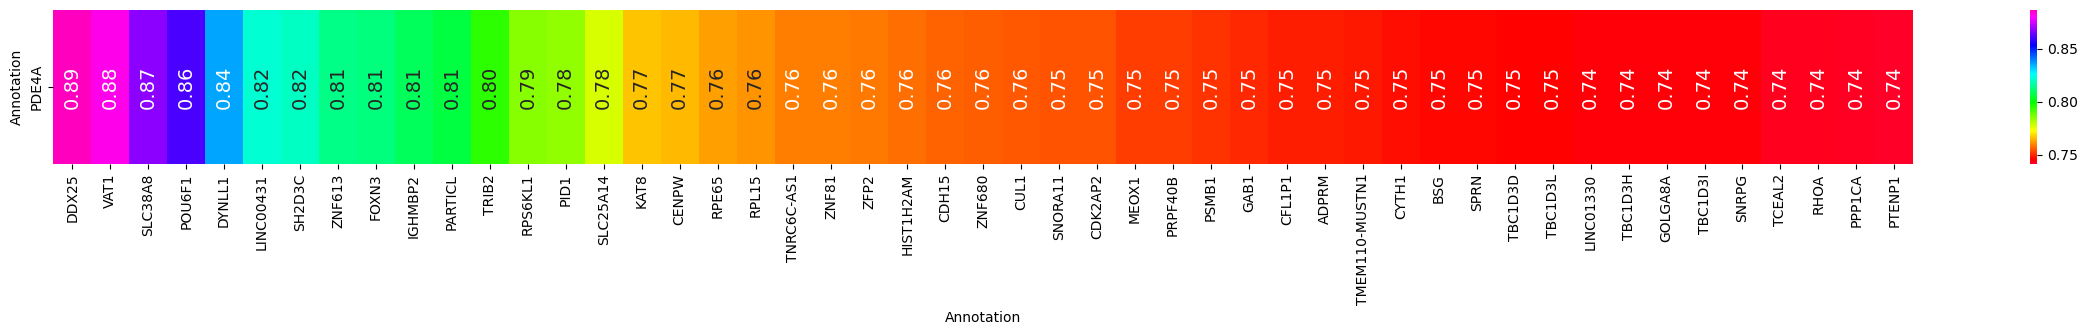

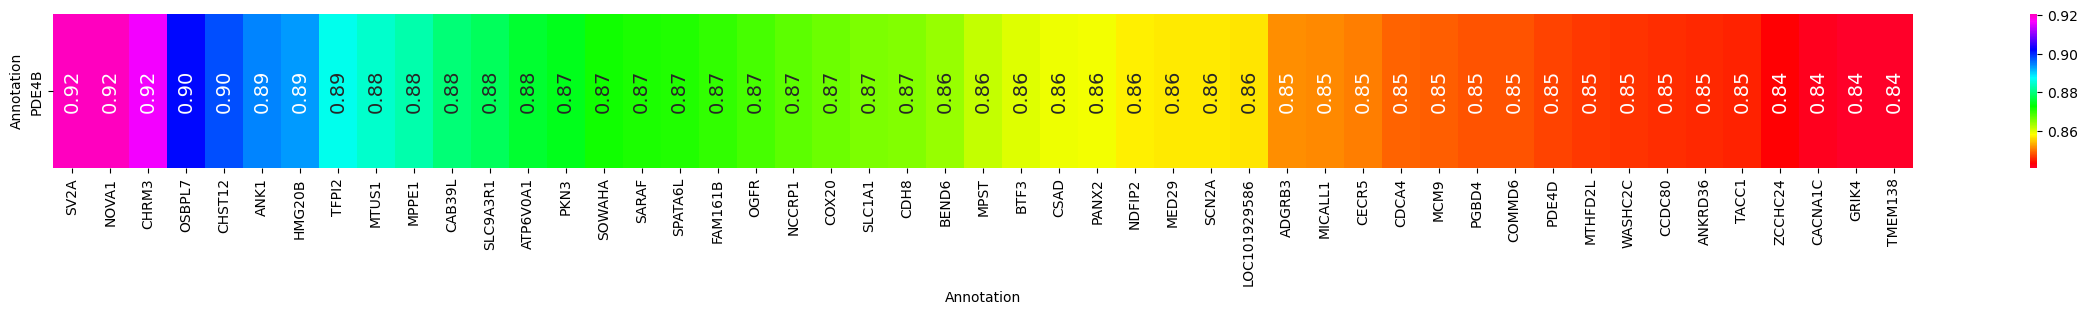

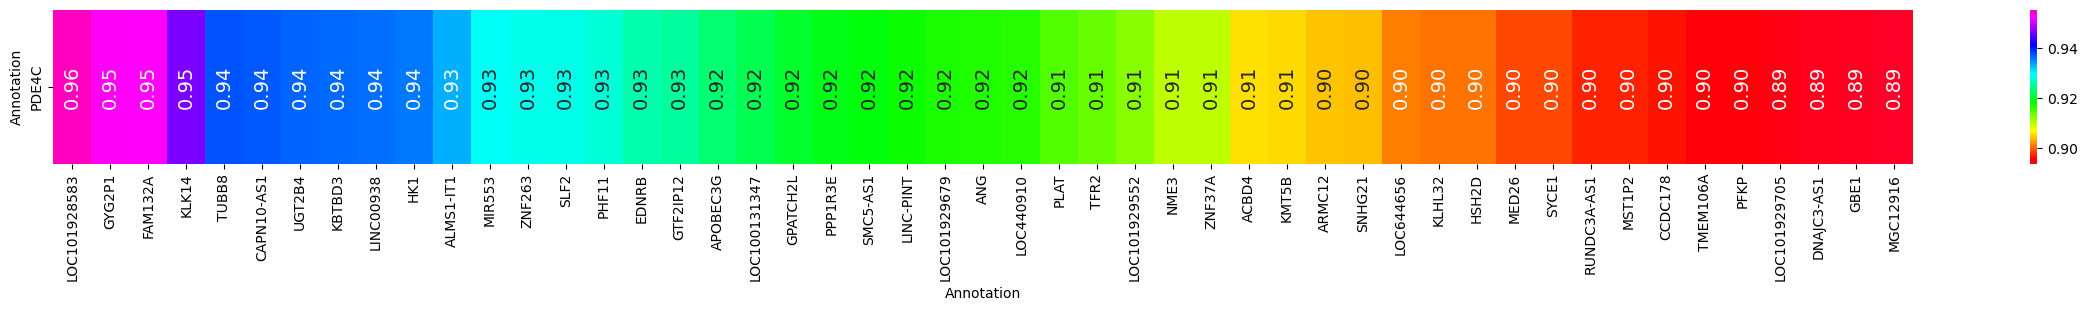

In [15]:
for gene in genes_list: 
    disp_corr4singleGene(gene)